# Stastical Modelling intro

Techniques in the world of statistics and techniques in the world of machine learning often use very different terminologies to describe very similar things. I think it's helpful to start from a more stats-y perspective.

## What are we trying to achieve with modeling?

Broadly trying to do some mix of describing a theory about a process and/or using that theory to predict something unknown.

Usually we're observing something (or several things). We give that lots of different names,

- Independent variable
- Feature (machine learning land)
- Predictor
- Explanatory variable
- Covariate
- Regressors

and we're trying to find a way to use those observations to describe some process that we're interested in, and some outcome from that process. We might call that outcome the

- Dependent variable
- Response variable
- Target

For example - I've got information about the weight of a car (an independent variable), and I want to determine the relationship to the cars miles per gallon (my dependent variable).

That makes a kind of intuitive sense, but I think it makes sense to run through this example in a more abstract way. So have data described in a single dimension, and it's got a co-ordinate system of 'weight'

And we've defined another co-ordinate system, 'miles per gallon', and we want to describe things using this dimension instead. How do we map between them?

![](images/modelling_with_linear_regression/stats.png)

And we're going to be looking at that translation today, of moving data from one co-ordinate system onto another. Because that's kind of intuitive and we can draw plots really easily, calling one of our co-ordinates 'x' and one 'y'. 

But the way of mathematically defining that translation between one co-ordinate system and another doesn't really change, if you're mapping from 10 dimension space into 7 dimension space it's still all linear algebra under the hood. Linear algebra is kind of a tough topic to jump into, I found the 3 brown 1 blue videos at https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab pretty good.

So sometimes we might be translating our data multiple times, into co-ordinate systems that don't have a nice understandable meaning. The data science techniques change a bit based on the kind of transformation's you're looking to do, but the underlying concept of shifting data is basically always there.

But today we're mostly going to look at taking data defined in one co-ordinate system and translating it into a different co-ordinate system.

So one equation for that would just be, the equation for plotting a straight line.

y = ax + b

We need to find some fixed values for 'a' and 'b', which we can use to translate our data from 'x' land into 'y' land.

So that kind of shows the two halves of modelling. We've first defined the kind of model we're using (shifting data from 1 dimension to another, a.k.a. a 2d line). And we could just pick some values for a + b and that would be a complete model (but a poor one). So the second half is finding a way to estimate good values for a + b. 

These things we need to find values for are called

- coefficients (stats land)
- weights (machine learning land)

I'm not going to jump into how any specific estimating technique works (for linear regression we're using ordinary least squares if you're interested). But again the concepts are pretty consistent across all of data science land.

Our technique defines some kind of category for success, usually minimising the error between our observed 'y' and the 'y' we would get if we defined a specific 'a' and 'b'. (and again we could do that by hand if we wanted)

- objective function
- cost function
- loss function

and the process of minimising this function is

- fitting
- training (machine learning land)

## data

In [4]:
library(repr)

# Change plot size
options(repr.plot.width=6, repr.plot.height=4)

In [5]:
#?mtcars # uncomment to get a full description of the data
#summary(mtcars)
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


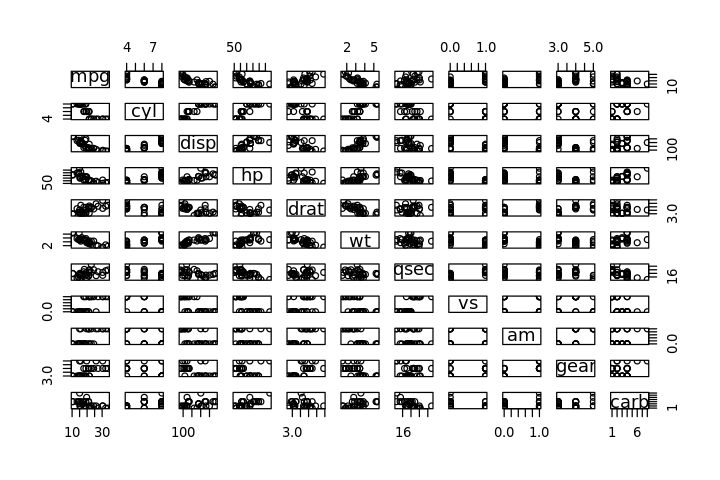

In [6]:
plot(mtcars)

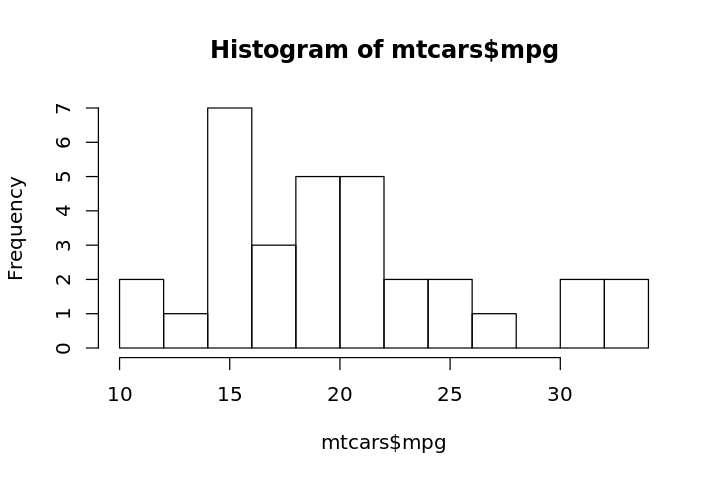

In [7]:
hist(mtcars$mpg, breaks=10)

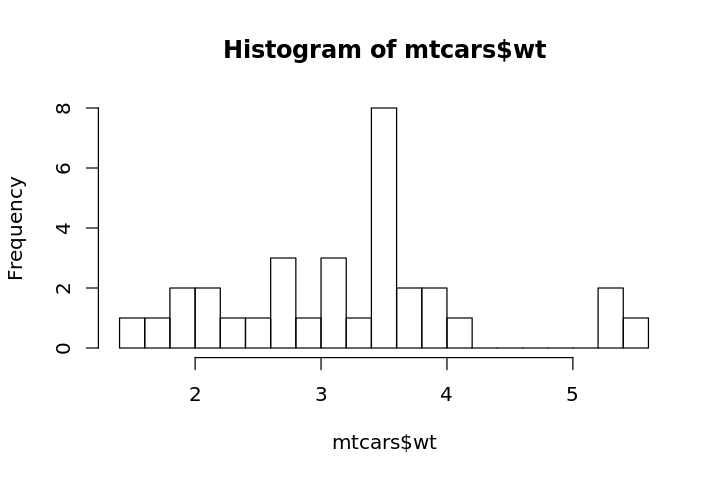

In [64]:
hist(mtcars$wt, breaks=20)

## Wait what are we doing?

What's our hypothesis? Well for this session we're interested in that basic description of a line, y = ax + b. All we're able to do there is multiply x by some value - that means that our hypothesis is that there's a linear relationship between what we choose for our 'x' and mpg.

Linear relationship means, essentially that as we change our 'x' there's a constant change in the resulting 'y'. Mathematically that's the case because all we're doing is multiplying and adding.

So lets take two variables that seemed to have a relationship with miles per gallon, weight and horsepower.

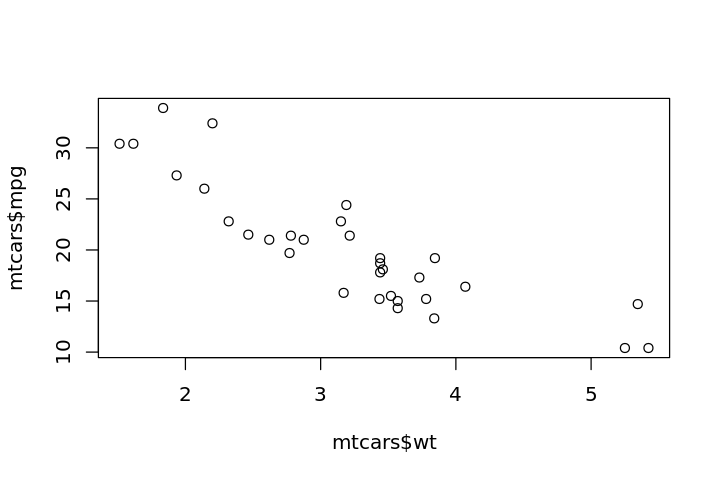

In [99]:
plot(x=mtcars$wt, y=mtcars$mpg)

It looks like either of these could work. Weight seems like a cleaner straight line though, horsepower maybe has a bit of a curve.

We can visually tell that the parameters are correlated, but we can also quantify that:

In [15]:
cor(mtcars$wt, mtcars$mpg)

[1] -0.8676594

## Ok lets go

So we've defined our model,

mpg = (\<some coefficient> * weight) + intercept

So now we can fit our model by feeding in our observed data. So we're using the 'lm' (linear model) function, and telling it that our model is that the response value 'mpg' is dependent on our predictor 'wt'. 

In [ ]:
results <- lm(mpg ~ wt, mtcars)

In [21]:
results$coefficients

(Intercept)          wt 
  37.285126   -5.344472

## What do these estimates actually mean? and are they fitting the data in an interesting way?

### Confidence interval

Confidence interval shows us a few things. It's kind of a weird one so I hope I explain this right.

We've used a dataset which contains a number of observations. The way we've sampled those observations means we've hopefully got a representative distribution of the complete population (i.e. all cars). Still, if we resampled many times from that complete population (observed a different set of cars), then the values we feed into our training process would vary a bit each time. 

A 95% confidence interval means that, the results of our linear regression will fall between these values in 19 out of 20 samples from the same population.

Ok, well the important bit is we're not saying, the answer is '-5', we're saying that we have a range of plausible values.

In [33]:
confint(results, level=0.95)

,2.5 %,97.5 %
(Intercept),33.450500,41.119753
wt,-6.486308,-4.202635


### Null hypothesis

One important thing it shows is that '0' isn't one of those plausible values. If our hypothesis is that miles per gallon is dependent on weight, a coefficient of '0' would be the opposite right, that would be saying that mpg is not dependent at all on weight. 

(a different way of quantifying whether our results are significant is the p-value - in this case they use the same underlying properties).

### Prediction interval

So we've got a range of values that we think are plausible for our coefficients. When we want to predict some new value this helps us build a range of plausible values for that prediction. But this time we're even more uncertain, because even if we had a perfect estimate of our coefficients the data has some natural variation in where it sits above / below our line.

In [39]:
predict(results, data.frame(wt=4.5), interval='predict')

fit,lwr,upr
13.235,6.750452,19.71956


If we look at the confidence interval for our specific prediction (rather than the coeffecient of the model) we get a range of likely values for the mean prediction.

In [84]:
predict(results, data.frame(wt=4.5), interval='confidence')

fit,lwr,upr
13.235,11.40347,15.06654


### plotting all that

Plotting our predictions as a line, with confidence interval and prediction interval

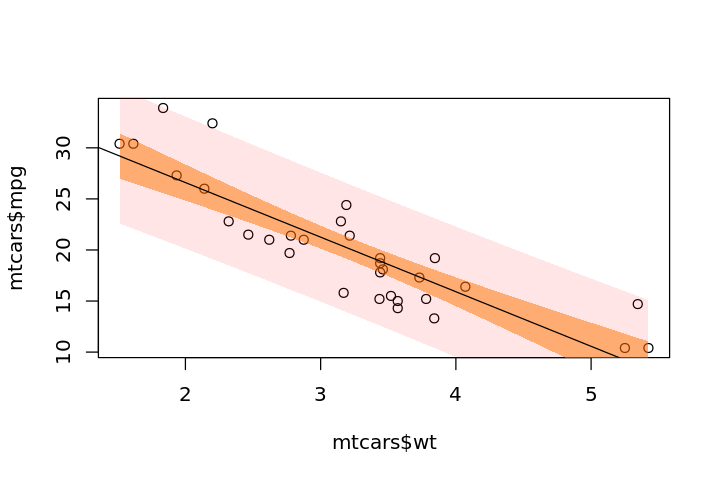

In [63]:
# thanks https://stackoverflow.com/questions/14069629/how-can-i-plot-data-with-confidence-intervals

new_xs <- seq(min(mtcars$wt), max(mtcars$wt), length.out=100)
preds <- predict(results, newdata = data.frame(wt=new_xs), interval='prediction')
conf_ints <- predict(results, newdata = data.frame(wt=new_xs), interval='confidence')

plot(mtcars$wt, mtcars$mpg)
polygon(c(rev(new_xs), new_xs), c(rev(conf_ints[ ,3]), conf_ints[, 2]), col = rgb(1, 0.5, 0, 0.5), border=NA)

polygon(c(rev(new_xs), new_xs), c(rev(preds[ ,3]), preds[, 2]), col = rgb(1, 0, 0, 0.1), border=NA)

abline(results)

## But is it a good model?

We talked about one of the assumptions we made earlier, that the relationship between x and y can be modelled linearly. There are some other things we need to be careful about to have confidence in our model.

Our dataset is very small so these plots can be a bit noisy

The most visually intuitive assessment is looking at residuals (errors) vs. the fitted value (predicted value). In other words, when the model predicts a mpg of '20', what kind of errors do we see?

This shows us areas wher eour model is not effective, and we might want to make tweaks to it.

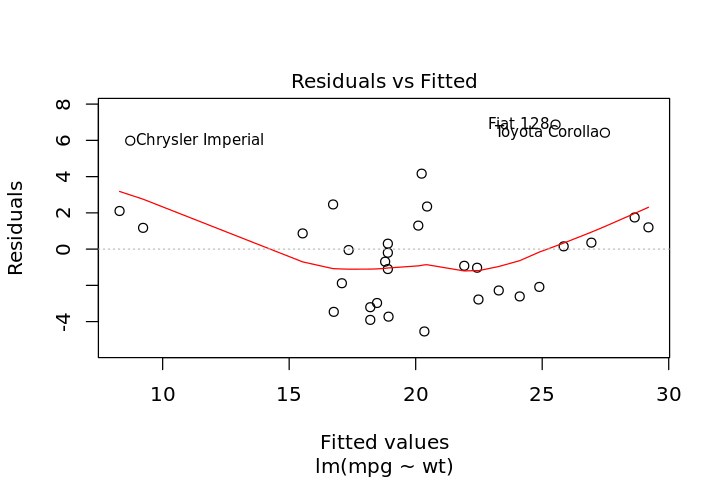

In [81]:
# just do plot(results) to see everything)
plot(results, which=c(1, 1))

One assumption in our technique is that the magnitude of the errors is independent of the predicted value. If we see the opposite in this graph, e.g. if the errors were very small when predicting 10 mpg but very large when predicting 30mpg, then the techniques we use to assess the model might not be valid.

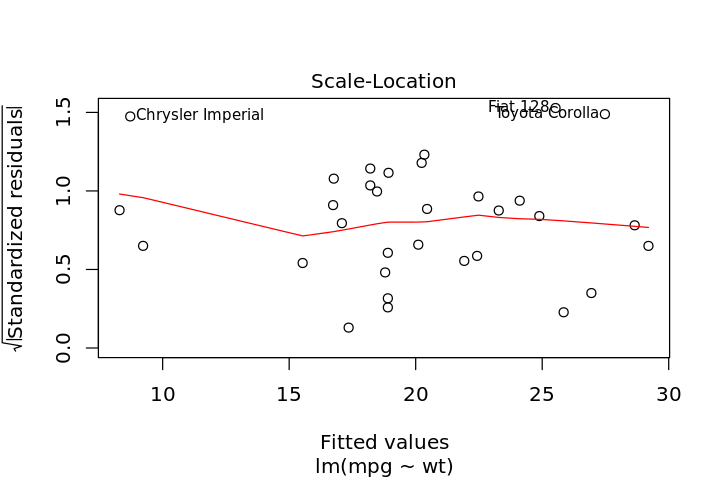

In [93]:
plot(results, which=c(3, 3))

One assumption in the technique is that our errors have a mean of 0 and are equally likely to be greater than 0 or less than 0. In other words, they're normally distributed with a mean of 0 (a.k.a. bell curve). If this isn't true then some of our assessments of the model might be misleading.

It's kind of a tough one to explain but we basically expect the points to follow the dotted line. There's a nice explanation of different results at https://stats.stackexchange.com/a/101290

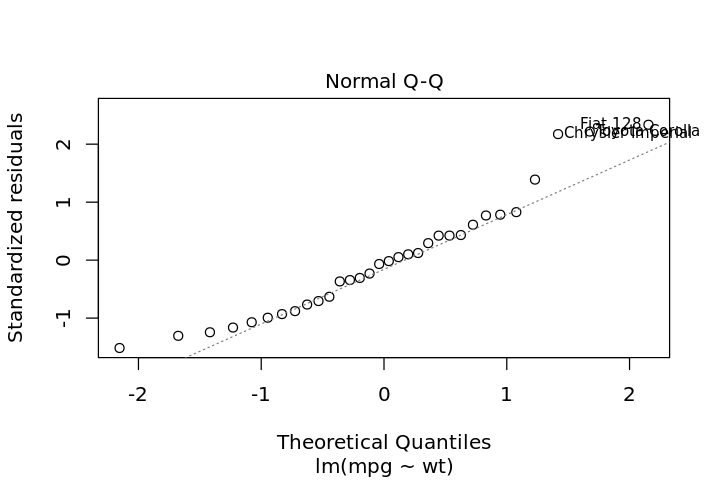

In [95]:
plot(results, which=c(2, 2))

## What's next?

Not just limited to one variable, not just straight lines.

In [103]:
results2 <- lm(mpg ~ wt + poly(wt, 2), mtcars)

Warning message in predict.lm(results2, newdata = data.frame(wt = new_xs), interval = "prediction"):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(results2, newdata = data.frame(wt = new_xs), interval = "confidence"):
“prediction from a rank-deficient fit may be misleading”

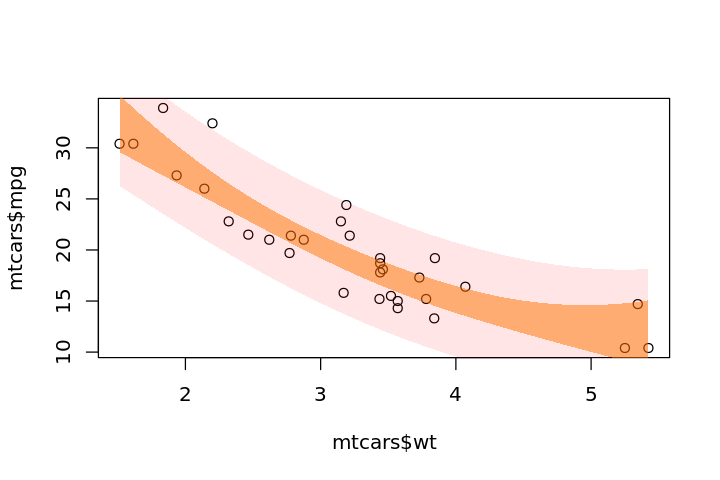

In [104]:
# thanks https://stackoverflow.com/questions/14069629/how-can-i-plot-data-with-confidence-intervals

new_xs <- seq(min(mtcars$wt), max(mtcars$wt), length.out=100)
preds <- predict(results2, newdata = data.frame(wt=new_xs), interval='prediction')
conf_ints <- predict(results2, newdata = data.frame(wt=new_xs), interval='confidence')

plot(mtcars$wt, mtcars$mpg)
polygon(c(rev(new_xs), new_xs), c(rev(conf_ints[ ,3]), conf_ints[, 2]), col = rgb(1, 0.5, 0, 0.5), border=NA)

polygon(c(rev(new_xs), new_xs), c(rev(preds[ ,3]), preds[, 2]), col = rgb(1, 0, 0, 0.1), border=NA)

What if you're looking at a response variable that varies exponentially, never goes below 0, represents a count of things or an on/off state? Linear models can handle all of that, under the banner of 'Generalised Linear Model (GLM').

## Interesting content

https://statsthinking21.github.io/statsthinking21-core-site/index.html

## Datasets

https://www.kaggle.com/quantbruce/real-estate-price-prediction